#  Machine learning project notebook

### Student: G00219132 Susan Hudson - Module: Machine Learning & Statistics, GMIT

### Notebook structure

The notebook is split up into the following sections which are based on the project statement requirements.

* Section One - General setup and importation of necessary python libraries/packages and dataset
* Section Two - Descriptive Statistics
* Section Three - Inferential Statistics
* Section Four - Predictive Statistics
* Section Five - references and conclusion

## Section One - Importing libraries and dataset

Below is a list of python packages used in this notebook and the loading of the dataset and conversion to a pandas dataframe.


In [1]:
# Import all necessary python packages for this vnotebook

import matplotlib.pyplot as plt 
#Matplotlib is a Python plotting library and Pyplot is a matplotlib module which provides a MATLAB type interface.
plt.rcParams['figure.figsize'] = [10, 6]  #sets figure sizes for plots
%matplotlib inline  
#command abovr ensures plots display correctly in the notebook
import seaborn as sns  #Seaborn is a Python package used for plotting data.
import pandas as pd  #Pandas is a Python package for use with data frames.
import scipy.stats as ss #statistical functions package
import numpy as np #NumPy is a Python package for mathematical computing
import sklearn.datasets #dataset location
import keras as kr #deep learning library - used for predictive neural networks 

Using TensorFlow backend.


In [2]:
# dataset is imported and converted to a pandas dataframe
sklearn.datasets.load_boston
from sklearn.datasets import load_boston
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target

##  Section Two - Descriptive Statistics

Descriptive Statistics looks at sunmary statistics for the population sample [1], to get a 'feel' for the data. I have chosen both visual and quamtitative analysis methods. 
 

In [3]:
# check data set shape and print first five rows 
print(boston.data.shape)
df.head()

(506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
#a table of the summary statistics for all columns in the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [5]:
# below outines the characteristcs of the dataset and explains what each variable represents in the dataset.
# Note - this dataset is from the 1970s and some attributes are a reflection of those times, for the purpose of the project
# I imported the dataset as a whole but will not be considering some of the variables when doing evaluations of data subsets!

print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

#### Distribution of Median Values

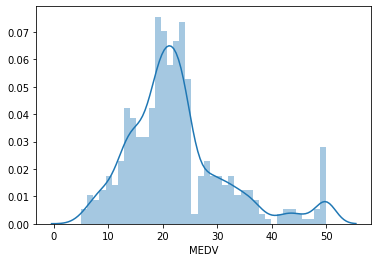

In [6]:
#below I am looking at the distribution of the target variable, MEDV

sns.distplot(df["MEDV"], bins=40)
plt.show()


The plot of Median Value shows a mainly normal distribution. It looks like there is some sort of price capping /banding as there seem to be a disproportionate number of properties with median value 50. 
The box plot of MEDV below appears to back up this opinion. 

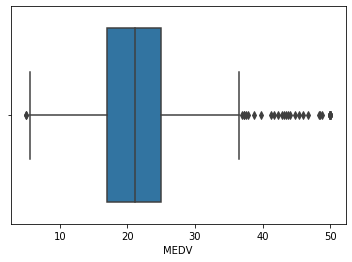

In [7]:
# a box plot of MEDV to look at the shape
sns.boxplot(df.MEDV)

#### Correlation
I then looked at whether there was much, or any correlation between the individual dataset variables and in particular whether any strong correlations existed between target variable MEDV and other variables. 

I did both a correlarion heatmap for a visual display and a correlaion table. 

Correlation is a statistical measure of the degree to which changes to the value of one variable predict change to the value of another. A coefficient close to  1 would indicate that the two change in the same direction, e.g as one increases the other increases, as one decreases the other decreases. A value close to -1 indicates a strong negative correlation, e.g as one variable increases the other decreases. 

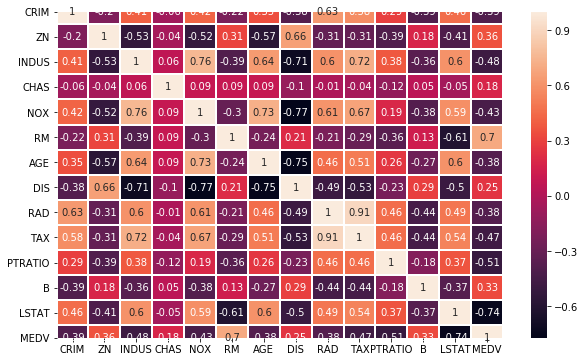

In [8]:
# a correlation heatmap of the dataset

correlation_heatmap = df.corr().round(2)
fig, ax = plt.subplots(figsize=(10,6))   
sns.heatmap(correlation_heatmap, annot=True,linewidths= 1, ax=ax)

plt.show()

In [9]:
# correlation table for the dataset
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Looking at the correlation heatmap/table the strongest correlations with MEDV are a positive correlation with RM, average number of rooms per dwelling and a negative correlation with LSTAT % lower status of the population.
This would make sense as one would imagine that house prices are higher when they are larger and also that they would be lower in poorer areas. This is supported by the negative correlation between LSTAT and RM, the higher the % of 'lower status' the lower the number of rooms. There is also a negative correlation with PTRATIO pupil-teacher ratio by town. It appears that the higher the PTRATIO the lower the MEDV This could imply that areas of lower socio economic status would have higher PTRATIO, it could be attributed to funding or even orevalence of orivate schools in more affluent areas. The posive correlation between LSTAT and PTRATIO could support this observation. 

#### Distribution plots
Below are distribution plots for each variable. Some appear skewed, CRIM, ZN, AGE for example. RM and MEDV are normally distributed.  As CHAS is categorical the distribution shows merely the counts for each value, 1 or 0, worth noting that there are a far greated number at 0. 

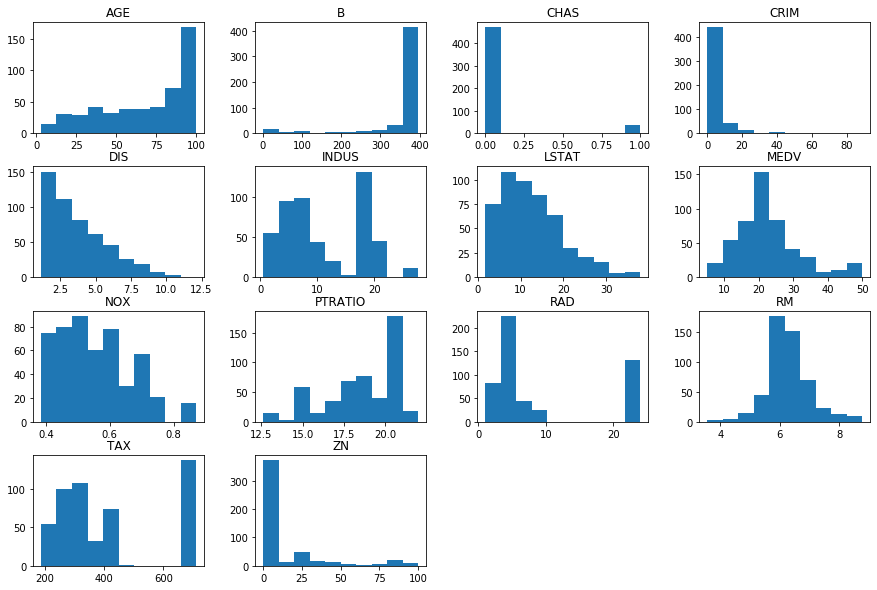

In [10]:
df.hist(bins=10, figsize=(15,10), grid=False)
plt.show()

## Section Three - Inferential Statistics

Inferential statistics looks at the sample and infers trends about the larger population from which the sample was drawn. Where populations are large it would be impossible to get data for the entire population so inferences are made based on the statistical sample. The project brief was to analyse whether there was a sigificant difference in median house prices between houses along the Charles river and those that aren't. 

To do this I decided to do a two sample t test and create two subsets to do a t test to see whether the mean of median values is the same for houses bordering the river and houses not near the river. The null hypothesis I am testing being that there is no difference in the average median value of houses bordering the river and houses not near the river.

The alternative hypothesis being that there is a difference in median values of houses bordering the river and houses not near the river.

In [11]:
# create two subsets to do a t test dfnear, houses bordering the river, dffar houses away from the river

# houses bordering the river
dfnear =  df[(df['CHAS'] == 1.0)]
dfnear.reset_index(inplace= True)
#print ( dfnear)

#houses bordering the river with values of 50k removed
dfnear2 =  df[(df['CHAS'] == 1.0)]
dfnearno_out = dfnear2[(dfnear2['MEDV']<40)]
#print (dfnearno_out)

#houses away from the river
dffar =  df[(df['CHAS'] == 0.0)]
dffar.reset_index(inplace= True)
print(dffar)

# t test houses near and houses away from river
from scipy.stats import ttest_ind
n =dfnear['MEDV']
f =dffar['MEDV']
result = ss.ttest_ind(n,f)
print('t test result for CHAS:  ', result)
# result obtained causes me to reject the hypothesis
n_noout = dfnearno_out['MEDV']

# t test houses near the river excluding values of 50 and houses away from river
from scipy.stats import ttest_ind
dfnearno_out['MEDV']
f =dffar['MEDV']
result = ss.ttest_ind(n_noout,f)
print('t test result for CHAS, no 50k values included:  ', result)


     index     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0        0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1        1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2        2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3        3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4        4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   
..     ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
466    501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0   
467    502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0   
468    503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0   
469    504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0   
470    505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0   

       TAX  PTRATIO       B  LSTAT  MEDV  
0    296.0     15.3  396.90   4.98  24.0  
1    242.0   

The initial result obtained causes me to reject the null hypothesis and conclude that the mean of median value for houses along the river is not equal to the mean of median values of houses away from the river. However, below I took a further look at the two subsets of data for CHAS. Looking at the distributions I am not convinced that the t test is of any value as I don't feel that the data follows the required conitions for being approximately normal [2]. The sample away from the river is OK but those near the river are a appear to have a distribution with outliers, this appears to be mainly the the 'capped' 50k values. 

Having reviewed the plots I repeated the t test, this time removing values of 50k. The resulting p value of 0.51 would mean that 1 cannot conclude that a significant difference exists. 
However I am sticking with the original rejection on the basis that in this instance removal of outliers is not correct as the outliers are capped values so in all liklihood are 50 and above and in the sample size represent 20% of the total sample so are not insignificant. 




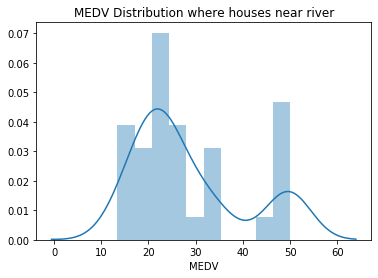

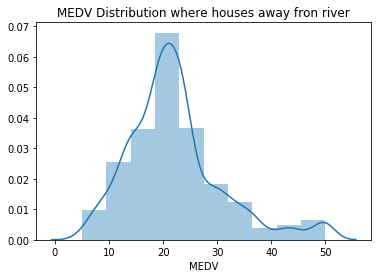

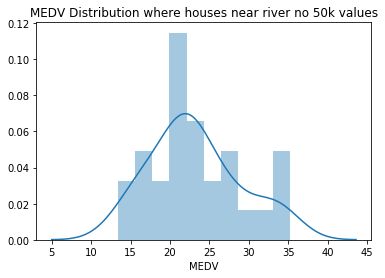

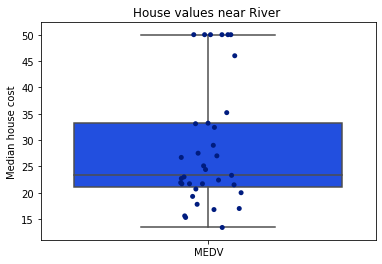

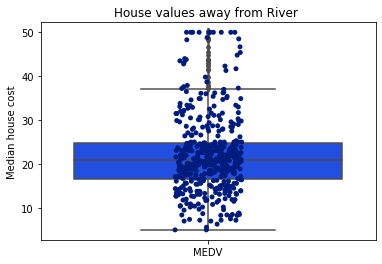

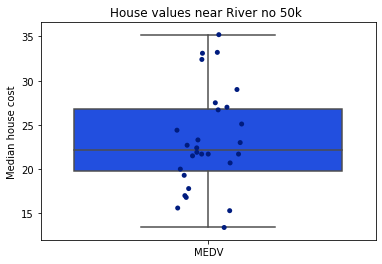

In [12]:
# seaborn distribution plots 

sns.distplot(dfnear["MEDV"], bins=10).set_title ("MEDV Distribution where houses near river")
plt.show()
sns.distplot(dffar["MEDV"], bins=10).set_title ("MEDV Distribution where houses away fron river")
plt.show()
sns.distplot(dfnearno_out["MEDV"], bins=10).set_title ("MEDV Distribution where houses near river no 50k values")
plt.show()

#box plot with stripplot overlaid to show data points
df4 = pd.DataFrame(data = dfnear, columns = [ 'MEDV'] )
sns.boxplot(x="variable", y="value", data= pd.melt(df4), palette="bright").set_title("House values near River ")
sns.stripplot(x="variable", y="value", data= pd.melt(df4), palette="dark").set_title("House values near River ")
plt.ylabel('Median house cost')
plt.xlabel('')
plt.show()

#box plot with stripplot overlaid to show data points
df5 = pd.DataFrame(data = dffar, columns = [ 'MEDV'] )
sns.stripplot (x="variable", y="value", data= pd.melt(df5), palette="dark").set_title("House values away from River ")
sns.boxplot(x="variable", y="value", data= pd.melt(df5), palette="bright").set_title("House values away from River ")
plt.ylabel('Median house cost')
plt.xlabel('')
plt.show()

#box plot with stripplot overlaid to show data points
df6 = pd.DataFrame(data = dfnearno_out, columns = [ 'MEDV'] )
sns.boxplot(x="variable", y="value", data= pd.melt(df6), palette="bright").set_title("House values near River no 50k ")
sns.stripplot(x="variable", y="value", data= pd.melt(df6), palette="dark").set_title("House values near River no 50k ")
plt.ylabel('Median house cost')
plt.xlabel('')
plt.show()

## Section four - predictive statistics

The brief for this section of the project was to use Keras to build a neural network that could predict the median house price (MEDV) based on the other values in the dataset. There were no other restrictions and I decided to take the following approach. 
* build a neural network and train on all variables, 
* look at some pre processing of data and again train on all variables.
* Reduce the number of inputs and repeat the above approach.

Select all variables as inputs and MEDV as output

In [30]:
x = df.iloc[:,0:13]
y = df.iloc[:,13]


### Build neural network model
the neural network I built is a sequential model where layers were added one at a time. 
the model layers 

In [32]:
from sklearn.model_selection import train_test_split 
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Activation

m = models.Sequential()
m.add(layers.Dense(64, activation='relu', input_dim =13))
m.add(layers.Dense(64, activation='relu'))
m.add(Dense(1,kernel_initializer='normal',activation='linear',use_bias=False))
m.compile(loss='mse', optimizer='adam',metrics=['accuracy'])
    

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
m.fit(x_train, y_train, epochs=1000, batch_size=253)

Epoch 1/1000
404/404 [==============================] - 1s 2ms/step - loss: 1249.8640 - accuracy: 0.0000e+00
Epoch 2/1000
404/404 [==============================] - 0s 30us/step - loss: 822.3698 - accuracy: 0.0000e+00
Epoch 3/1000
404/404 [==============================] - 0s 114us/step - loss: 503.6462 - accuracy: 0.0000e+00
Epoch 4/1000
404/404 [==============================] - 0s 30us/step - loss: 287.8795 - accuracy: 0.0025
Epoch 5/1000
404/404 [==============================] - 0s 599us/step - loss: 160.6410 - accuracy: 0.0000e+00
Epoch 6/1000
404/404 [==============================] - 0s 92us/step - loss: 105.6604 - accuracy: 0.0050
Epoch 7/1000
404/404 [==============================] - 0s 27us/step - loss: 106.4770 - accuracy: 0.0025
Epoch 8/1000
404/404 [==============================] - 0s 510us/step - loss: 128.8855 - accuracy: 0.0099
Epoch 9/1000
404/404 [==============================] - 0s 201us/step - loss: 148.7922 - accuracy: 0.0074
Epoch 10/1000
404/404 [============

404/404 [==============================] - 0s 314us/step - loss: 52.2813 - accuracy: 0.0000e+00
Epoch 78/1000
404/404 [==============================] - 0s 183us/step - loss: 52.1701 - accuracy: 0.0000e+00
Epoch 79/1000
404/404 [==============================] - 0s 30us/step - loss: 52.0658 - accuracy: 0.0000e+00
Epoch 80/1000
404/404 [==============================] - 0s 37us/step - loss: 52.0034 - accuracy: 0.0000e+00
Epoch 81/1000
404/404 [==============================] - 0s 27us/step - loss: 51.8591 - accuracy: 0.0000e+00
Epoch 82/1000
404/404 [==============================] - 0s 32us/step - loss: 51.7988 - accuracy: 0.0000e+00
Epoch 83/1000
404/404 [==============================] - 0s 27us/step - loss: 51.6869 - accuracy: 0.0000e+00
Epoch 84/1000
404/404 [==============================] - 0s 30us/step - loss: 51.5691 - accuracy: 0.0000e+00
Epoch 85/1000
404/404 [==============================] - 0s 27us/step - loss: 51.4680 - accuracy: 0.0000e+00
Epoch 86/1000
404/404 [========

In [28]:
print(m.metrics_names)
m.evaluate(x, y)

['loss', 'accuracy']
506/506 [==============================] - 0s 55us/step


[8.967057461795129, 0.02766798436641693]

In [23]:
m.predict(x_test)
#m.summary()

predictval =  np.around(m.predict(x_test).T,2)
print(predictval)
output = (y_test.as_matrix().astype(np.float32))
print(output)
round(np.sqrt(np.sum((m.predict(x_test).T -output)**2)))


[[17.56 16.45 23.6  15.58 26.57 13.71 21.76 23.3  20.29 19.66 35.66 18.46
  12.71 35.77 22.65 26.9  21.71 31.02 37.08 25.36 23.9  26.71 14.02 21.16
  17.2  19.09 29.15 19.2  16.   25.74 16.67 22.96 13.49 20.97 34.5  39.12
  25.23 13.78 16.76 21.34 21.63 35.07  7.84 22.46 36.84 11.48 16.42 33.91
  20.83 36.48 22.87 19.77 10.48  9.79 31.52 25.58 23.78 25.02 20.85 36.64
  10.44 24.73 12.99 20.75 19.69 37.3  12.7  19.49 26.82 22.54 38.32 26.17
  36.95 14.59 22.43 13.28 14.59  7.21 28.26 22.3  12.81 32.88 24.37  6.59
  28.33 16.32 14.15 20.69  2.97 19.81 21.36 21.35 21.24 37.93  7.38 22.41
  16.25 12.89 20.54 17.3  11.64  3.85]]
[17.8 19.6 22.7 13.1 30.3 19.1 21.  27.5 14.9 19.4 35.4 18.8 13.5 35.1
 21.7 23.2 22.2 30.8 31.  28.7 22.  23.5 17.6 21.9 18.3 26.6 33.4 20.4
 18.4 29.6 19.9 21.  12.7 22.5 32.9 43.1 24.4 17.1 20.1 19.3 20.6 37.2
 10.2 23.2 50.   7.5 22.9 42.3 21.1 44.8 21.2 19.3  9.7 20.2 42.8 20.8
 18.6 21.5 21.8 33.8 12.  23.3 13.3 22.6 19.4 50.  15.  13.5 33.  22.9
 36.  26.4 50

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


46.0

In [24]:
m.evaluate(x_test, y_test)

102/102 [==============================] - 0s 186us/step


[20.49273947173474, 0.0]

  ## Pre Processing of Data for Keras
I will now investigate whether pre processing the data (still using all 13 inputs) makes any significant improvement

In [ ]:
# now going to repeat the above using the four inputs of most interest
Y=df['MEDV']
print(Y)
Xfour =df[['ZN','RM', 'LSTAT','PTRATIO' ]]
print(Xfour)

In [ ]:

m = models.Sequential()
#m.add(layers.Dense(52, activation='relu', input_dim =13))
#m.add(Dense(40,input_dim=13,kernel_initializer='normal',activation='relu',use_bias=False))
m.add(layers.Dense(39, activation='relu', input_dim =4))
m.add(layers.Dense(39, activation='relu'))
#m.add(layers.Dense(1,))
#m.add(Dense(40,kernel_initializer='random_uniform',activation='relu',use_bias=False))
m.add(Dense(1,kernel_initializer='normal',activation='linear',use_bias=False))

m.compile(loss='mse', optimizer='adam',metrics=['accuracy'])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(Xfour, Y, test_size=0.2)
m.fit(x_train, y_train, epochs=1000, batch_size=22)

In [ ]:
print(m.metrics_names)
m.evaluate(Xfour, Y)

In [ ]:
m.predict(x_test)
#m.summary()

predictval =  np.around(m.predict(x_test).T,2)
print(predictval)
output = (y_test.as_matrix().astype(np.float32))
print(output)
round(np.sqrt(np.sum((m.predict(x_test).T -output)**2)))

### scaling

In [ ]:
from sklearn.model_selection import train_test_split 

In [ ]:
#preprocessing of all dataset[]
# scaling 
import sklearn.preprocessing as pre
xscale = pd.DataFrame(pre.scale(X), columns = X.columns)
xscale
yscale = pd.DataFrame(pre.scale(Y))
xscale, yscale

### fitting and transforming

In [ ]:
scaler=pre.StandardScaler()
scaler.fit(X)
X
scaler.mean_ , X.std()

In [ ]:
xscale = pd.DataFrame(scaler.transform(X), columns = X.columns)
xscale

In [ ]:
##X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
X_train, X_test, Y_train, Y_test = train_test_split(xscale, yscale, test_size = 0.2)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(Y_test)
print(X_test)

### whitening data

In [ ]:
X.corr()

In [ ]:
import sklearn.decomposition as dec
pca = dec.PCA(n_components = 13, whiten = True)
pca.fit(X_train)
x_train_white = pd.DataFrame(pca.transform(X_train), columns=X.columns)
x_train_white

In [ ]:
x_train_white.corr().round(),x_train_white.mean().round(),x_train_white.std().round()

### build neural network model


from sklearn.model_selection import train_test_split 
Y=df['MEDV']
print(Y)
X =df[['ZN','RM', 'LSTAT','PTRATIO' ]]
print(X)

In [ ]:
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Activation

m = models.Sequential()
#m.add(layers.Dense(52, activation='relu', input_dim =13))
#m.add(Dense(40,input_dim=13,kernel_initializer='normal',activation='relu',use_bias=False))
m.add(layers.Dense(64, activation='relu', input_dim =13))
#m.add(layers.Dense(52, activation='relu'))
#m.add(layers.Dense(1,))
#m.add(Dense(40,kernel_initializer='random_uniform',activation='relu',use_bias=False))
m.add(Dense(1,kernel_initializer='normal',activation='linear',use_bias=False))


m.compile(loss='mse', optimizer='adam',metrics=['accuracy'])
    

In [ ]:
#_train, X_test, Y_train, Y_test = train_test_split(xscale, yscale, test_size = 0.2)
#X_train, X_test, Y_train, Y_test = train_test_split(xwhite,scale, test_size = 0.2)

#print(X_train.shape)
#print(X_test.shape)
#print(Y_train.shape)
#print(Y_test.shape)
#print(Y_test)
#print(X_test)

In [ ]:
#x = X_train
#y = m.predict()

#history = m.fit(X_train,Y_train, validation_split = 0.20,epochs =150, batch_size =25)
#history = m.fit(x_train_white,Y_train, validation_split = 0.20,epochs =150, batch_size =25)
history = m.fit(x_train_white,Y_train, epochs =75, batch_size =25)

#history = m.fit(X_train,Y_train,epochs =150, batch_size =25)
print(history.history.keys())



In [ ]:
x_test_white = scaler.transform(X_test)
m.predict(x_test_white).round().T
Y_test.as_matrix().astype(np.float32)
m.evaluate(x_test_white, Y_test)

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
m.predict(X_test).T
m.summary()
print (m.predict(X_test).T)


In [ ]:
#output = (Y_test)
#print(output)
#np.sqrt(np.sum((m.predict(X_test).T -output)**2))

## references


https://docs.scipy.org/doc/scipy/reference/stats.html
[2] https://stattrek.com/hypothesis-test/difference-in-means.aspx
https://blog.minitab.com/blog/understanding-statistics/what-can-you-say-when-your-p-value-is-greater-than-005
    
    
Pre Processing Data
https://keras.io/models/about-keras-models/
https://scikit-learn.org/stable/modules/preprocessing.html
https://keras.io/
    
### books
[1] Statistics: A very Short Introduction Hand, D., J 2008
test git desktop
Python Data Analysis - Fandango, Armando
    